In [ ]:
%who

Interactive namespace is empty.


In [ ]:
!pip install tensorflow==2.0.0
!pip install keras==2.3.0

     |████████████████████████████████| 86.3MB 116kB/s 
     |████████████████████████████████| 3.8MB 41.9MB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=ec4ab6ef623619d90a63e8fd30e4d85c345628c7738f7a7bf64f22cd0a8c410b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import tensorflow as tf

from matplotlib import pyplot 
from matplotlib.image import imread

Using TensorFlow backend.


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.3.0


In [ ]:
# Set plot size
pyplot.rcParams['figure.figsize'] = [15, 10]

In [ ]:
# This sets whether we want parameters or not
train = False

# We want detailed output at the end of every epoch
verbose = 1

# Epochs
epochs = 50

# Batch size
batch_size = 64

# Learning rate
lr = 0.05

# Momentum
momentum = 0.9

# Shape of expected inputs output
in_shape=(64, 64, 3)

# Shape of expected output
out_shape=17

In [ ]:
os.chdir('/content/drive/My Drive/Data/Amazon')

In [ ]:
!ls

ExtractedFeatures.png
ipykernel_launcher.py_plot.png
ipykernel_launcher.py_resnet_plot.png
ipykernel_launcher.py_vgg16_plot.png
ipykernel_launcher.py_vgg19_finetune_plot.png
my_keras_model.h5
my_logs
my_resnet_keras_model.h5
my_vgg16_keras_model.h5
my_vgg19_fine_tuned_keras_model.h5
planet_data.npz
train-jpg
train_v2_subset.csv


In [ ]:
def get_sample(folder = 'train-jpg'):
    '''
    Input: File path
    Output: Sample of 9 images to plot from training set
    '''
    # List all files in dir
    files = [f for f in os.listdir(folder)]
    # Select nine files randomly
    random_files = np.random.choice(files, size = 16, replace = False)
    # Return
    return(random_files)

In [ ]:
def plot_first_sixteen(sample, folder = 'train-jpg/'):
    '''
    Input: File path to training data.
    Output: Plot of first 9 images in training data.
    
    We plot 9 images because otherwise we will have to
    write formatting code for the sub-plot which is not
    worth the time.
    '''
    for i in range(16):
        # pyplot.subplot takes 3 digit code 
        # The first number is the number of rows
        # The second number is the number of columns
        # The third number is the position in the subplot 
        pyplot.subplot(4, 4, 1 + i)
        # Load image pixels
        image = imread(folder + sample[i])
        # Plot raw pixel data
        pyplot.imshow(image)
    # Show the figure
    pyplot.show()
    # End the function
    return

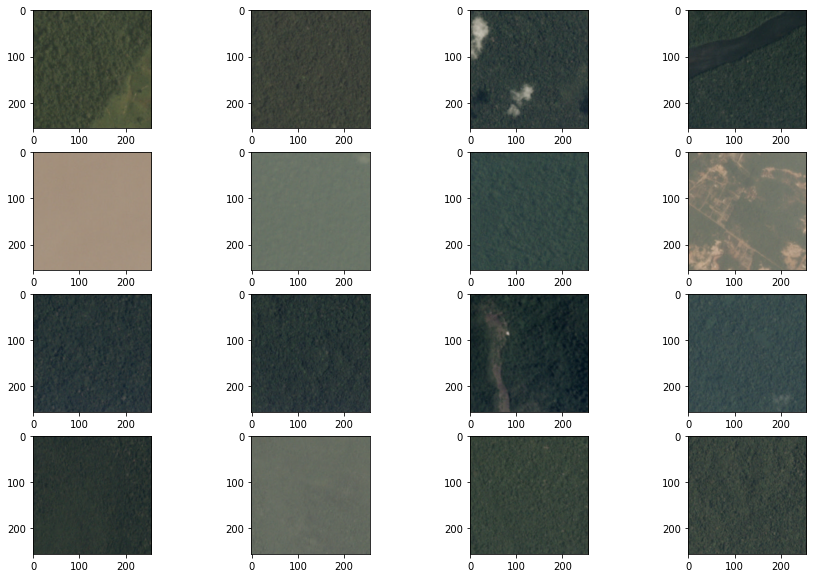

In [ ]:
if not train: 

    # Create a sample
    sample = get_sample()

    # Plot the first nine images
    plot_first_sixteen(sample)

In [ ]:
def load_mapping_data(file_name = 'train_v2_subset.csv'):
    '''
    Input: mapping file name
    Output: mapping file data-frame
    '''
    mapping_df = pd.read_csv(file_name)
    
    return(mapping_df)

In [ ]:
if not train:
    # Call the function and check out the output
    mapping_df = load_mapping_data()

In [ ]:
if not train:
    print(pd.DataFrame(list(mapping_df.shape), index = ['Rows', 'Columns'], columns = ['']))

             
Rows     4000
Columns     2


In [ ]:
if not train:
    # Print out the first few rows
    print(mapping_df.head())

  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


In [ ]:
def create_tag_mapping(mapping_df):
    '''
    Input: mapping data-frame
    Output: Dictionary mapping labels to integers.
    '''
    # Initialize labels
    # Labels is a set so calling update will not affect uniqueness
    labels = set()
    
    # Loop through the data-frame
    # Split the tag values on spaces
    # Then update the set with the tags
    for i in range(len(mapping_df)):
        tags = mapping_df['tags'][i].split(' ')
        labels.update(tags)
    
    # Turn into a list and sort
    labels = list(labels)
    labels.sort()
    
    # First relate labels to integers
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    
    # Return statement
    return(labels_map, inv_labels_map)

In [ ]:
if not train:
    
    # Function call
    labels_map, inv_labels_map = create_tag_mapping(mapping_df)
    print(labels_map)
    print(inv_labels_map)

{'agriculture': 0, 'artisinal_mine': 1, 'bare_ground': 2, 'blooming': 3, 'blow_down': 4, 'clear': 5, 'cloudy': 6, 'conventional_mine': 7, 'cultivation': 8, 'habitation': 9, 'haze': 10, 'partly_cloudy': 11, 'primary': 12, 'road': 13, 'selective_logging': 14, 'slash_burn': 15, 'water': 16}
{0: 'agriculture', 1: 'artisinal_mine', 2: 'bare_ground', 3: 'blooming', 4: 'blow_down', 5: 'clear', 6: 'cloudy', 7: 'conventional_mine', 8: 'cultivation', 9: 'habitation', 10: 'haze', 11: 'partly_cloudy', 12: 'primary', 13: 'road', 14: 'selective_logging', 15: 'slash_burn', 16: 'water'}


In [ ]:
def create_file_mapping(mapping_df):
    '''
    Input: mapping data-frame
    Output: mapping dictionary of filename to tags
    '''
    # Initialize the dictionary
    mapping = dict()
    
    # Iterate through the data-frame range
    for i in range(len(mapping_df)):
        # Store names and tags
        name, tags = mapping_df['image_name'][i], mapping_df['tags'][i]
        # Put them in the dictionary as name:tag key value pairs
        mapping[name] = tags.split(' ')
    
    # Return mapping
    return mapping

In [ ]:
if not train:

    # Test function call
    mapping_dict = create_file_mapping(mapping_df)

    # Print to display output
    print({k: mapping_dict[k] for k in list(mapping_dict)[:2]})

{'train_0': ['haze', 'primary'], 'train_1': ['agriculture', 'clear', 'primary', 'water']}


In [ ]:
def one_hot_encode(tags, labels_map):
    '''
    There are 17 elements in tag. 
    We want a 17 element vector of 0s and 1s.
    Each element should be 1 if the corresponding
    category is in the image file and 0 otherwise.
    '''
    # Create empty vector
    encoding = np.zeros(len(labels_map), dtype='uint8')
    # Mark 1 for each tag in the vector
    for tag in tags:
        encoding[labels_map[tag]] = 1
    return encoding


In [ ]:
if not train:

    # Test function call
    print(one_hot_encode(['agriculture', 'clear', 'primary', 'water'], labels_map))

[1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]


In [ ]:
def compress_dataset(path, file_mapping, tag_mapping, target_size = (64, 64)):
    '''
    Inputs: 1) Folder: Path to training folder
            2) Images file path: Path to training data images within training folder
            3) File mapping: Mapping of training images to their labels
            4) Tag mapping:  One to one mapping of labels to integers
            5) Target size:  Size that input images should be cropped to
    Output: 1) Training data and labels as numpy arrays of unsigned integers
    
    Why is path separately specified? 
    This is probably to ensure that if images are stored remotely like on Amazon S3 
    then this parameter can be easily changed to get data from there. 
    '''
    # Photos and targets stored here
    photos, targets = list(), list()
    # Enumerate files in the directory

    for filename in os.listdir(path):
        # Load image
        photo = keras.preprocessing.image.load_img(path + filename, target_size=target_size)
        # Convert to numpy array
        photo = keras.preprocessing.image.img_to_array(photo, dtype='uint8')
        # Get tags
        tags = file_mapping[filename[:-4]]
        # One hot encode tags
        target = one_hot_encode(tags, tag_mapping)
        # Store photos 
        photos.append(photo)
        # Store targets
        targets.append(target) 

    # We know color channel values go from 0 to 255 and will not be negative
    # Convert to arrays while making data type unsigned
    # Unsigned integer saves space 
    X = np.asarray(photos, dtype='uint8')
    y = np.asarray(targets, dtype='uint8')
    
    return(X, y)


In [ ]:
!ls

ExtractedFeatures.png
ipykernel_launcher.py_plot.png
ipykernel_launcher.py_resnet_plot.png
ipykernel_launcher.py_vgg16_plot.png
ipykernel_launcher.py_vgg19_finetune_plot.png
my_keras_model.h5
my_logs
my_resnet_keras_model.h5
my_vgg16_keras_model.h5
my_vgg19_fine_tuned_keras_model.h5
planet_data.npz
train-jpg
train_v2_subset.csv


In [ ]:
def prep_data(folder = 'train-jpg/', target_size = (64, 64)):    
    '''
    Input: None 
    Output: None 
    Description: 
    This is a function that is run for its side effect.
    It runs the code to take in raw images and return single compressed file.
    '''
    # First take a sample
    sample = get_sample()
    # Plot the first nine images
    plot_first_sixteen(sample)
    # Create mapping data-frame
    mapping_df = load_mapping_data()
    # Create tag mapping
    labels_map, inv_labels_map = create_tag_mapping(mapping_df)
    # Create file mapping
    mapping = create_file_mapping(mapping_df)
    # Load data-set
    X, y = compress_dataset(folder, mapping, labels_map, target_size)
    # Print X.shape, y.shape
    print(X.shape, y.shape)
    # Save both arrays to one file in compressed format
    np.savez_compressed('planet_data.npz', X, y)
    # End of function
    return

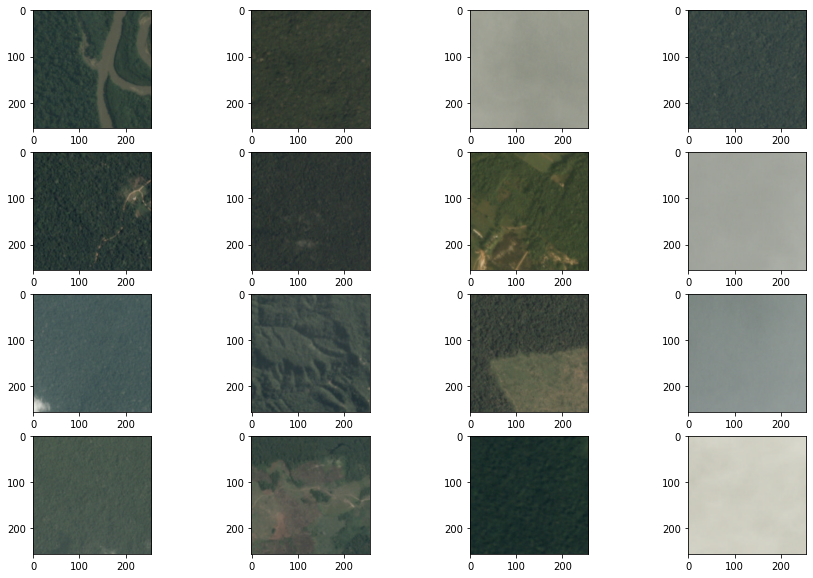

(4000, 64, 64, 3) (4000, 17)


In [ ]:
if not train:
  prep_data()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from keras import backend

In [ ]:
def load_dataset():
    '''
    Input: N/A
    Output: Planet data split into train and test
    '''
    # Load dataset
    data = np.load('planet_data.npz')
    X, y = data['arr_0'], data['arr_1']

    # Separate into train and test datasets
    trainX, testX, trainY, testY = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Print out shapes as a sanity check
    print(trainX.shape, trainY.shape, testX.shape, testY.shape)
    
    # Create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, vertical_flip=True, rotation_range=90)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    
        
    # Return both forms of data-sets
    return(trainX, trainY, testX, testY, train_datagen, test_datagen)

In [ ]:
# Calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
    '''
    This function is manually written here.
    This is because this competition uses F-beta score as a metric.
    This metric is no longer supported by Keras as v.2.0.0. There is
    a Kaggle kernel which proposes the function given below as a fix
    for this. Until then we use the function code given in the post
    to measure our model's performance.
    
    Open questions: 
    What is the keras.backend module? 
    What does karas.backend.clip do? 
    What does keras.backend.round do? 
    What does keras.backend.epsilon do? 
    '''
    # Clip predictions
    y_pred = keras.backend.clip(y_pred, 0, 1)

    # Calculate true positives
    tp = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)), axis=1)
    
    # Calculate false positives
    fp = keras.backend.sum(keras.backend.round(keras.backend.clip(y_pred - y_true, 0, 1)), axis=1)
    
    # Calculate false negatives
    fn = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true - y_pred, 0, 1)), axis=1)
    
    # Calculate precision
    p = tp / (tp + fp + keras.backend.epsilon())
    
    # Calculate recall
    r = tp / (tp + fn + keras.backend.epsilon())
    # Calculate fbeta, averaged across each class
    bb = beta ** 2
    # F-beta score final calculation
    fbeta_score = keras.backend.mean((1 + bb) * (p * r) / (bb * p + r + keras.backend.epsilon()))
    # Return statement
    return(fbeta_score)


In [ ]:
def benchmark(trainX, trainY, testX, testY):
    '''
    Input: Training and test datasets and labels
    Output: Training and test score if we just always predict ones
    '''
    # Make all one predictions
    train_yhat = np.asarray([np.ones(trainY.shape[1]) for _ in range(trainY.shape[0])])
    test_yhat = np.asarray([np.ones(testY.shape[1]) for _ in range(testY.shape[0])])
    
    # Evaluate predictions with sklearn
    train_score = fbeta_score(trainY, train_yhat, 2, average='samples')
    test_score = fbeta_score(testY, test_yhat, 2, average='samples')
    print('All Ones (sklearn): train=%.3f, test=%.3f' % (train_score, test_score))

    # Evaluate predictions with keras
    train_score = fbeta(keras.backend.variable(trainY), keras.backend.variable(train_yhat))
    test_score = fbeta(keras.backend.variable(testY), keras.backend.variable(test_yhat))
    print('All Ones (keras): train=%.3f, test=%.3f' % (train_score, test_score))
    

    # Return the train and test sets for future use
    return(train_score, test_score)


In [ ]:
# Baseline model for the Planet dataset
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.layers import Conv2D, Flatten, Activation, MaxPooling2D, Dense, Input, Dropout, BatchNormalization
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random


# Custmized Model

In [ ]:
def define_model(in_shape=(64, 64, 3), out_shape=17, lr = 0.05, momentum = 0.9, opt = 'Adam'):
    '''
    Input: Input shape and output shape
    Output: Keras model object
    '''
    # Define model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(out_shape, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta, keras.metrics.accuracy])
        

    return model


In [ ]:
# Import packges
import os
import time

def summarize_diagnostics(history):
    '''
    Input: Keras history project
    Output: Display diagnostic learning curves
    '''
    # Plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # Plot accuracy
    pyplot.subplot(212)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    
    # Save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()


In [ ]:
def make_tensorboard_directory():
    '''
    Input: N/A
    Output: Tensorboard directory path
    '''
    root_logdir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    
    return(os.path.join(root_logdir, run_id))


In [ ]:
# We will wrap our model as a Keras Classifier object
# We import the GridSearchCV package
# We import the Keras classifier package
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
def choose_parameters(X, Y, trainX, trainY, testX, testY, 
                      opt = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 
                      epochs=1, batch_size = 10):    
    '''
    Input: 1) Training set
           2) Validation set
           3) List of optimizers to try
           4) No. of epochs eash search of the grid will use
           5) Batch size
           
    Output: Best parameters along with accuracy metric
    '''
    
    # Create model
    model = KerasClassifier(build_fn=define_model, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Create the parameter dictionary
    param_grid = dict(opt=opt)
    
    # Prepare iterators
    train_flow = X.flow(trainX, trainY, batch_size=batch_size)
    test_flow = Y.flow(testX, testY, batch_size=batch_size)
    
    # Get the datasets
    train_X, train_Y = train_flow.next()
    
    # Create the grid search instance
    # We use 3 fold cross-validation
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_result = grid.fit(train_X, train_Y)

    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    return


In [ ]:
def run_test_harness(train_datagen, test_datagen, epochs = 2, verbose = 1, batch_size = 128, lr = 0.05, 
                     momentum = 0.9, in_shape=(64, 64, 3), out_shape=17):
    '''
    Input: None
    Output: None
    Run the test harness for evaluating a model
    '''    
    # Add checkpoints for regular saving
    checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_fbeta',
                                                      mode = "max",patience=10, restore_best_weights=True)
    
    # Add TensorBoard logging
    tensorboard_cb = keras.callbacks.TensorBoard(make_tensorboard_directory())

    # Prepare iterators
    train_it = train_datagen.flow(trainX, trainY, batch_size=batch_size)
    test_it = test_datagen.flow(testX, testY, batch_size=batch_size)
    
    # Define model
    model = define_model(in_shape, out_shape, lr, momentum)
    
    # Fit model
    history = model.fit_generator(train_it, 
                                  steps_per_epoch=len(train_it), 
                                  validation_data=test_it, validation_steps=len(test_it), 
                                  callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb], 
                                  epochs=epochs, 
                                  verbose=1)
    
    # Evaluate model
    loss, fbeta, accuracy = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> loss=%.3f, fbeta=%.3f, accuracy=%.3f' % (loss, fbeta, accuracy))
    
    # Learning curves
    summarize_diagnostics(history)


In [ ]:
# Load dataset
import sklearn

trainX, trainY, testX, testY, train_datagen, test_datagen = load_dataset()

# Run benchmark
results = benchmark(trainX, trainY, testX, testY)

# Optimize hyperparameters
choose_parameters(train_datagen, test_datagen, trainX, trainY, testX, testY)

(2800, 64, 64, 3) (2800, 17) (1200, 64, 64, 3) (1200, 17)
All Ones (sklearn): train=0.482, test=0.485
All Ones (keras): train=0.482, test=0.485
Best: 0.704248 using {'opt': 'Adagrad'}
0.000000 (0.000000) with: {'opt': 'SGD'}
0.058824 (0.083189) with: {'opt': 'RMSprop'}
0.704248 (0.156675) with: {'opt': 'Adagrad'}
0.000000 (0.000000) with: {'opt': 'Adadelta'}
0.000000 (0.000000) with: {'opt': 'Adam'}
0.000000 (0.000000) with: {'opt': 'Adamax'}
0.124183 (0.175621) with: {'opt': 'Nadam'}


In [ ]:
if not train: 
  run_test_harness(train_datagen, test_datagen,
                   epochs, verbose, batch_size,
                   lr, momentum, in_shape, 
                   out_shape)

Epoch 1/50
44/44 [==============================] - 103s 2s/step - loss: 0.2660 - fbeta: 0.6190 - accuracy: 2.3109e-04 - val_loss: 0.1855 - val_fbeta: 0.6386 - val_accuracy: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 99s 2s/step - loss: 0.2175 - fbeta: 0.6743 - accuracy: 2.1008e-05 - val_loss: 0.2377 - val_fbeta: 0.6898 - val_accuracy: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 99s 2s/step - loss: 0.2089 - fbeta: 0.6945 - accuracy: 5.0420e-04 - val_loss: 0.2235 - val_fbeta: 0.6796 - val_accuracy: 4.9020e-05
Epoch 4/50
44/44 [==============================] - 101s 2s/step - loss: 0.2076 - fbeta: 0.6906 - accuracy: 4.8319e-04 - val_loss: 0.2220 - val_fbeta: 0.7195 - val_accuracy: 1.4706e-04
Epoch 5/50
44/44 [==============================] - 100s 2s/step - loss: 0.2014 - fbeta: 0.7037 - accuracy: 9.0336e-04 - val_loss: 0.1827 - val_fbeta: 0.7206 - val_accuracy: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 99s 2s/step - loss: 0.194

In [ ]:
import glob
test = glob.glob('./train-jpg/*.jpg', recursive=True)

model = define_model(in_shape=(64,64,3), out_shape = 17, lr = 0.05, momentum = 0.9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


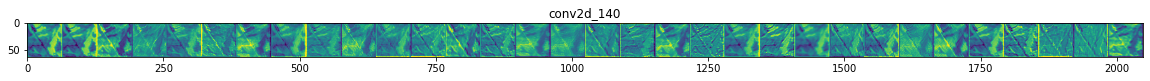

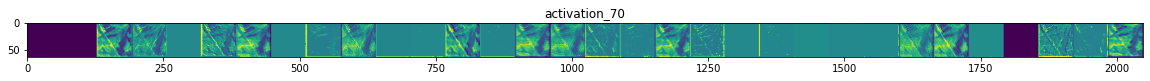

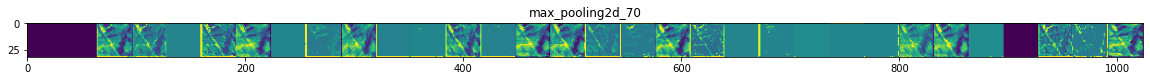

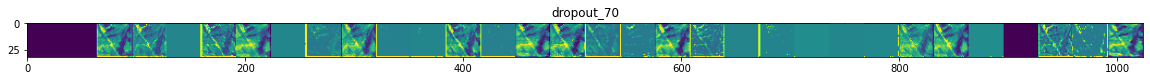

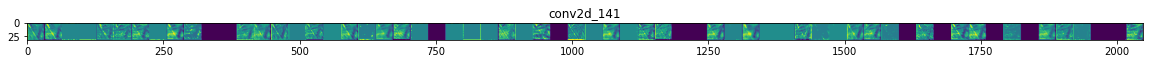

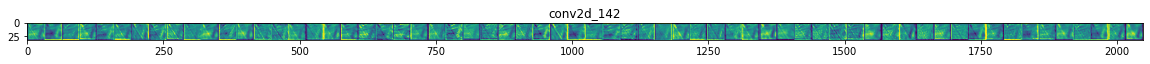

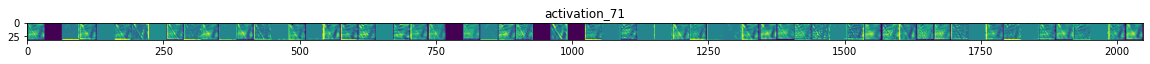

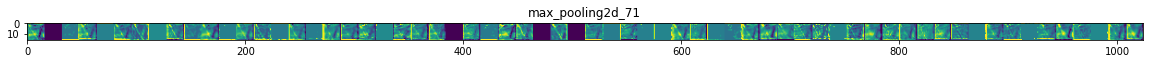

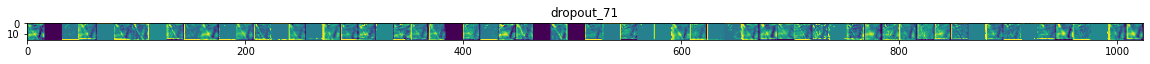

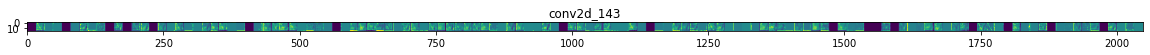

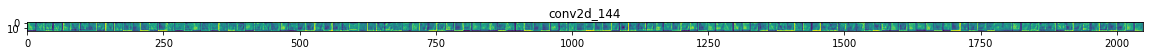

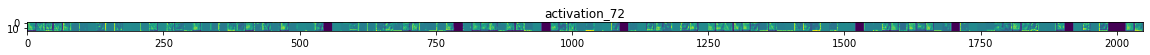

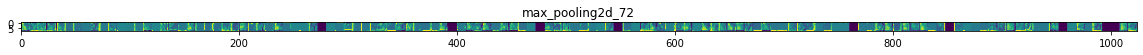

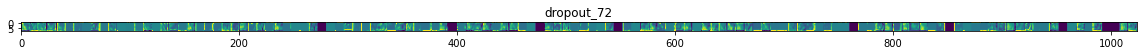

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(inputs = model.input, outputs = successive_outputs)

img_path = random.choice(test)

img = load_img(img_path, target_size=(64, 64, 3))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    pyplot.figure(figsize=(scale * n_features, scale))
    pyplot.title(layer_name)
    pyplot.grid(False)
    
    pyplot.imshow(display_grid, aspect='auto')

--------

# VGG 16 Transfer Learning

In [ ]:
import gc
gc.collect()

28

In [ ]:
from keras.applications.vgg16 import VGG16  #downloading model for transfer learning
vgg16 = VGG16(include_top=False ,weights='imagenet', input_shape=(64,64,3))

for i, layer in enumerate(vgg16.layers):
  layer.trainable = False
  print('{}, {}, {}'.format(i, layer.trainable, layer))

0, False, <keras.engine.input_layer.InputLayer object at 0x7fc250f60908>
1, False, <keras.layers.convolutional.Conv2D object at 0x7fc250f60588>
2, False, <keras.layers.convolutional.Conv2D object at 0x7fc250f60080>
3, False, <keras.layers.pooling.MaxPooling2D object at 0x7fc250fcca90>
4, False, <keras.layers.convolutional.Conv2D object at 0x7fc2510f05f8>
5, False, <keras.layers.convolutional.Conv2D object at 0x7fc25114e2e8>
6, False, <keras.layers.pooling.MaxPooling2D object at 0x7fc24d499518>
7, False, <keras.layers.convolutional.Conv2D object at 0x7fc24d499278>
8, False, <keras.layers.convolutional.Conv2D object at 0x7fc250c156a0>
9, False, <keras.layers.convolutional.Conv2D object at 0x7fc250b57748>
10, False, <keras.layers.pooling.MaxPooling2D object at 0x7fc24e285128>
11, False, <keras.layers.convolutional.Conv2D object at 0x7fc24e285080>
12, False, <keras.layers.convolutional.Conv2D object at 0x7fc250ca2be0>
13, False, <keras.layers.convolutional.Conv2D object at 0x7fc250e67cf8>


In [ ]:
def define_vgg16_model(in_shape=(64, 64, 3), out_shape=17, lr = 0.05, momentum = 0.9, opt = 'Adam'):
    '''
    Input: Input shape and output shape
    Output: Keras model object
    '''
    # Define model
    model1 = Sequential()
    model1.add(vgg16)

    model1.add(Flatten())
    model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model1.add(BatchNormalization())
    model1.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model1.add(BatchNormalization())
    model1.add(Dense(out_shape, activation='sigmoid'))
    
    # Compile model
    model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta, keras.metrics.accuracy])
        

    return model1


In [ ]:
# Import packges
import os
import time

def summarize_diagnostics_vgg16(history):
    '''
    Input: Keras history project
    Output: Display diagnostic learning curves
    '''
    # Plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # Plot accuracy
    pyplot.subplot(212)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    
    # Save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_vgg16_plot.png')
    pyplot.close()


In [ ]:
def make_tensorboard_directory_vgg16():
    '''
    Input: N/A
    Output: Tensorboard directory path
    '''
    root_logdir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("vgg16_run_%Y_%m_%d-%H_%M_%S")
    
    return(os.path.join(root_logdir, run_id))


In [ ]:
# We will wrap our model as a Keras Classifier object
# We import the GridSearchCV package
# We import the Keras classifier package
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def choose_parameters_vgg16(X, Y, trainX, trainY, testX, testY, 
                      opt = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 
                      epochs=1, batch_size = 10):    
    '''
    Input: 1) Training set
           2) Validation set
           3) List of optimizers to try
           4) No. of epochs eash search of the grid will use
           5) Batch size
           
    Output: Best parameters along with accuracy metric
    '''
    
    # Create model
    model = KerasClassifier(build_fn=define_vgg16_model, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Create the parameter dictionary
    param_grid = dict(opt=opt)
    
    # Prepare iterators
    train_flow = X.flow(trainX, trainY, batch_size=batch_size)
    test_flow = Y.flow(testX, testY, batch_size=batch_size)
    
    # Get the datasets
    train_X, train_Y = train_flow.next()
    
    # Create the grid search instance
    # We use 3 fold cross-validation
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_result = grid.fit(train_X, train_Y)

    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    return


In [ ]:
def run_test_harness(train_datagen, test_datagen, epochs = 2, verbose = 1, batch_size = 128, lr = 0.05, 
                     momentum = 0.9, in_shape=(64, 64, 3), out_shape=17):
    '''
    Input: None
    Output: None
    Run the test harness for evaluating a model
    '''    
    # Add checkpoints for regular saving
    checkpoint_cb = keras.callbacks.ModelCheckpoint("my_vgg16_keras_model.h5", save_best_only=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_fbeta',
                                                      mode = "max",patience=10, restore_best_weights=True)
    
    # Add TensorBoard logging
    tensorboard_cb = keras.callbacks.TensorBoard(make_tensorboard_directory_vgg16())

    # Prepare iterators
    train_it = train_datagen.flow(trainX, trainY, batch_size=batch_size)
    test_it = test_datagen.flow(testX, testY, batch_size=batch_size)
    
    # Define model
    model = define_vgg16_model(in_shape, out_shape, lr, momentum)
    
    # Fit model
    history = model.fit_generator(train_it, 
                                  steps_per_epoch=len(train_it), 
                                  validation_data=test_it, validation_steps=len(test_it), 
                                  callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb], 
                                  epochs=epochs, 
                                  verbose=1)
    
    # Evaluate model
    loss, fbeta, accuracy = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> loss=%.3f, fbeta=%.3f, accuracy=%.3f' % (loss, fbeta, accuracy))
    
    # Learning curves
    summarize_diagnostics_vgg16(history)


In [ ]:
# Load dataset
import sklearn

trainX, trainY, testX, testY, train_datagen, test_datagen = load_dataset()

# Run benchmark
results = benchmark(trainX, trainY, testX, testY)

# Optimize hyperparameters
choose_parameters_vgg16(train_datagen, test_datagen, trainX, trainY, testX, testY)

(2800, 64, 64, 3) (2800, 17) (1200, 64, 64, 3) (1200, 17)
All Ones (sklearn): train=0.482, test=0.485
All Ones (keras): train=0.482, test=0.485
Best: 0.000000 using {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'RMSprop'}
0.000000 (0.000000) with: {'opt': 'Adagrad'}
0.000000 (0.000000) with: {'opt': 'Adadelta'}
0.000000 (0.000000) with: {'opt': 'Adam'}
0.000000 (0.000000) with: {'opt': 'Adamax'}
0.000000 (0.000000) with: {'opt': 'Nadam'}


In [ ]:
if not train: 
  run_test_harness(train_datagen, test_datagen,
                   epochs, verbose, batch_size,
                   lr, momentum, in_shape, 
                   out_shape)

Epoch 1/50
44/44 [==============================] - 199s 5s/step - loss: 0.6205 - fbeta: 0.5997 - accuracy: 0.0000e+00 - val_loss: 0.6670 - val_fbeta: 0.5717 - val_accuracy: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 198s 5s/step - loss: 0.4363 - fbeta: 0.7681 - accuracy: 0.0000e+00 - val_loss: 0.4594 - val_fbeta: 0.7113 - val_accuracy: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 198s 5s/step - loss: 0.2586 - fbeta: 0.7804 - accuracy: 0.0000e+00 - val_loss: 0.2878 - val_fbeta: 0.7591 - val_accuracy: 0.0000e+00
Epoch 4/50
44/44 [==============================] - 197s 4s/step - loss: 0.1897 - fbeta: 0.7693 - accuracy: 0.0000e+00 - val_loss: 0.2297 - val_fbeta: 0.7546 - val_accuracy: 0.0000e+00
Epoch 5/50
44/44 [==============================] - 197s 4s/step - loss: 0.1693 - fbeta: 0.7797 - accuracy: 0.0000e+00 - val_loss: 0.2177 - val_fbeta: 0.7399 - val_accuracy: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 197s 4s/step - loss: 0.

In [ ]:
model = define_vgg16_model(in_shape=(64,64,3), out_shape = 17, lr = 0.05, momentum = 0.9)

--------

# VGG19 Transfer Learning

In [ ]:
# This sets whether we want parameters or not
train = False

# We want detailed output at the end of every epoch
verbose = 1

# Epochs
epochs = 50

# Batch size
batch_size = 64

# Learning rate
lr = 0.05

# Momentum
momentum = 0.9

# Shape of expected inputs output
in_shape=(64, 64, 3)

# Shape of expected output
out_shape=17

In [ ]:
import gc
gc.collect()

32078

In [ ]:
from keras.applications.vgg19 import VGG19  #downloading model for transfer learning
vgg19 = VGG19(include_top=False ,weights='imagenet', input_shape=(64,64,3))

for i, layer in enumerate(vgg19.layers):
  layer.trainable = False
  
  print('{}, {}, {}'.format(i, layer.trainable, layer))

80142336/80134624 [==============================] - 2s 0us/step
0, False, <keras.engine.input_layer.InputLayer object at 0x7ff31c178898>
1, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c178048>
2, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c178240>
3, False, <keras.layers.pooling.MaxPooling2D object at 0x7ff31c13a780>
4, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c13ae80>
5, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c12e198>
6, False, <keras.layers.pooling.MaxPooling2D object at 0x7ff31c00fb38>
7, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c00fe80>
8, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c0ee550>
9, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c0e3080>
10, False, <keras.layers.convolutional.Conv2D object at 0x7ff31c170a90>
11, False, <keras.layers.pooling.MaxPooling2D object at 0x7ff31bac2128>
12, False, <keras.layers.convolutional.Conv2D object at 0x7ff31bac2390>
13, Fal

In [ ]:
def define_vgg19_model(in_shape=(64, 64, 3), out_shape=17, lr = 0.05, momentum = 0.9, opt = 'Adam'):
    '''
    Input: Input shape and output shape
    Output: Keras model object
    '''
    # Define model
    model2 = Sequential()
    model2.add(vgg19)

    model2.add(Flatten())
    model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model2.add(BatchNormalization())
    model2.add(Dense(out_shape, activation='sigmoid'))
    
    # Compile model
    model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta, keras.metrics.accuracy])
    
    return model2


In [ ]:
# Import packges
import os
import time

def summarize_diagnostics_vgg19(history):
    '''
    Input: Keras history project
    Output: Display diagnostic learning curves
    '''
    # Plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # Plot accuracy
    pyplot.subplot(212)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    
    # Save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_vgg19_finetune_plot.png')
    pyplot.close()


In [ ]:
def make_tensorboard_directory_vgg19():
    '''
    Input: N/A
    Output: Tensorboard directory path
    '''
    root_logdir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("vgg19_finetune_run_%Y_%m_%d-%H_%M_%S")
    
    return(os.path.join(root_logdir, run_id))


In [ ]:
# We will wrap our model as a Keras Classifier object
# We import the GridSearchCV package
# We import the Keras classifier package
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def choose_parameters_vgg19(X, Y, trainX, trainY, testX, testY, 
                      opt = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 
                      epochs=1, batch_size = 10):    
    '''
    Input: 1) Training set
           2) Validation set
           3) List of optimizers to try
           4) No. of epochs eash search of the grid will use
           5) Batch size
           
    Output: Best parameters along with accuracy metric
    '''
    
    # Create model
    model2 = KerasClassifier(build_fn=define_vgg19_model, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Create the parameter dictionary
    param_grid = dict(opt=opt)
    
    # Prepare iterators
    train_flow = X.flow(trainX, trainY, batch_size=batch_size)
    test_flow = Y.flow(testX, testY, batch_size=batch_size)
    
    # Get the datasets
    train_X, train_Y = train_flow.next()
    
    # Create the grid search instance
    # We use 3 fold cross-validation
    grid = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3)
    grid_result = grid.fit(train_X, train_Y)

    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    return

In [ ]:
def run_test_harness(train_datagen, test_datagen, epochs = 2, verbose = 1, batch_size = 128, lr = 0.05, 
                     momentum = 0.9, in_shape=(64, 64, 3), out_shape=17):
    '''
    Input: None
    Output: None
    Run the test harness for evaluating a model
    '''    
    # Add checkpoints for regular saving
    checkpoint_cb = keras.callbacks.ModelCheckpoint("my_vgg19_fine_tuned_keras_model.h5", save_best_only=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_fbeta',
                                                      mode = "max",patience=10, restore_best_weights=True)
    
    # Add TensorBoard logging
    tensorboard_cb = keras.callbacks.TensorBoard(make_tensorboard_directory_vgg19())

    # Prepare iterators
    train_it = train_datagen.flow(trainX, trainY, batch_size=batch_size)
    test_it = test_datagen.flow(testX, testY, batch_size=batch_size)
    
    # Define model
    model2 = define_vgg19_model(in_shape, out_shape, lr, momentum)
    print(model2.summary())
    
    # Fit model
    history = model2.fit_generator(train_it, 
                                  steps_per_epoch=len(train_it), 
                                  validation_data=test_it, validation_steps=len(test_it), 
                                  callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb], 
                                  epochs=epochs, 
                                  verbose=1)
    
    
    # Evaluate model
    loss, fbeta, accuracy = model2.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> loss=%.3f, fbeta=%.3f, accuracy=%.3f' % (loss, fbeta, accuracy))
    
    # Learning curves
    summarize_diagnostics_vgg19(history)


In [ ]:
# Load dataset
import sklearn

trainX, trainY, testX, testY, train_datagen, test_datagen = load_dataset()

# Run benchmark
results = benchmark(trainX, trainY, testX, testY)

# Optimize hyperparameters
choose_parameters_vgg19(train_datagen, test_datagen, trainX, trainY, testX, testY)

(2800, 64, 64, 3) (2800, 17) (1200, 64, 64, 3) (1200, 17)
All Ones (sklearn): train=0.482, test=0.485
All Ones (keras): train=0.482, test=0.485
Best: 0.000000 using {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'RMSprop'}
0.000000 (0.000000) with: {'opt': 'Adagrad'}
0.000000 (0.000000) with: {'opt': 'Adadelta'}
0.000000 (0.000000) with: {'opt': 'Adam'}
0.000000 (0.000000) with: {'opt': 'Adamax'}
0.000000 (0.000000) with: {'opt': 'Nadam'}


In [ ]:
if not train: 
  run_test_harness(train_datagen, test_datagen,
                   epochs, verbose, batch_size,
                   lr, momentum, in_shape, 
                   out_shape)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_24 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               262272    
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dense_48 (Dense)             (None, 17)                2193      
Total params: 20,289,361
Trainable params: 264,721
Non-trainable params: 20,024,640
_________________________________________________________________
None
Epoch 1/50
44/44 [==============================] - 187s 4s/step - loss: 0.6289 - fbeta: 0.5925 

-----------

# ResNet-50 Transfer Learning

In [ ]:
# This sets whether we want parameters or not
train = False

# We want detailed output at the end of every epoch
verbose = 1

# Epochs
epochs = 50

# Batch size
batch_size = 64

# Learning rate
lr = 0.05

# Momentum
momentum = 0.9

# Shape of expected inputs output
in_shape=(64, 64, 3)

# Shape of expected output
out_shape=17

In [ ]:
import gc
gc.collect()

32078

In [ ]:
from keras.applications.resnet50 import ResNet50  #downloading model for transfer learning
r = ResNet50(include_top=False ,weights='imagenet', input_shape=(64,64,3))

for i, layer in enumerate(r.layers):
  layer.trainable = False
  
  print('{}, {}, {}'.format(i, layer.trainable, layer))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
0, False, <keras.engine.input_layer.InputLayer object at 0x7f2f325dfd68>
1, False, <keras.layers.convolutional.ZeroPadding2D object at 0x7f2f325dfba8>
2, False, <keras.layers.convolutional.Conv2D object at 0x7f2f325df2b0>
3, False, <keras.layers.normalization.BatchNormalization object at 0x7f2f325b2080>
4, False, <keras.layers.core.Activation object at 0x7f2f325d3f28>
5, False, <keras.layers.convolutional.ZeroPadding2D object at 0x7f2f325e45c0>
6, False, <keras.layers.pooling.MaxPooling2D object at 0x7f2f325d8eb8>
7, False, <keras.layers.convolutional.Conv2D object at 0x7f2f32aaee80>
8, False, <keras.layers.normalization.BatchNormalization object at 0x7f2f32c8dd30>
9, False, <keras.layers.core.Activation object at 0x7f2f32c8d748>
10, False, <keras.layers.convolutional.Conv2D object at 0x7f2f32c8d940>
11, False, <keras.layers.normalization.BatchNormalization object at 0x7f2f32effb00>
12, False, <keras.layers.core.Activatio

In [ ]:
def define_resnet_model(in_shape=(64, 64, 3), out_shape=17, lr = 0.05, momentum = 0.9, opt = 'Adam'):
    '''
    Input: Input shape and output shape
    Output: Keras model object
    '''
    # Define model
    model3 = Sequential()
    model3.add(r)

    model3.add(Flatten())
    model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model3.add(BatchNormalization())
    model3.add(Dense(out_shape, activation='sigmoid'))
    
    # Compile model
    model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta, keras.metrics.accuracy])
    
    return model3


In [ ]:
# Import packges
import os
import time

def summarize_diagnostics_resnet(history):
    '''
    Input: Keras history project
    Output: Display diagnostic learning curves
    '''
    # Plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # Plot accuracy
    pyplot.subplot(212)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    
    # Save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_resnet_plot.png')
    pyplot.close()


In [ ]:
def make_tensorboard_directory_resnet():
    '''
    Input: N/A
    Output: Tensorboard directory path
    '''
    root_logdir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("resnet_run_%Y_%m_%d-%H_%M_%S")
    
    return(os.path.join(root_logdir, run_id))


In [ ]:
# We will wrap our model as a Keras Classifier object
# We import the GridSearchCV package
# We import the Keras classifier package
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def choose_parameters_resnet(X, Y, trainX, trainY, testX, testY, 
                      opt = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], 
                      epochs=1, batch_size = 10):    
    '''
    Input: 1) Training set
           2) Validation set
           3) List of optimizers to try
           4) No. of epochs eash search of the grid will use
           5) Batch size
           
    Output: Best parameters along with accuracy metric
    '''
    
    # Create model
    model3 = KerasClassifier(build_fn=define_resnet_model, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Create the parameter dictionary
    param_grid = dict(opt=opt)
    
    # Prepare iterators
    train_flow = X.flow(trainX, trainY, batch_size=batch_size)
    test_flow = Y.flow(testX, testY, batch_size=batch_size)
    
    # Get the datasets
    train_X, train_Y = train_flow.next()
    
    # Create the grid search instance
    # We use 3 fold cross-validation
    grid = GridSearchCV(estimator=model3, param_grid=param_grid, cv=3)
    grid_result = grid.fit(train_X, train_Y)

    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    return

In [ ]:
def run_test_harness(train_datagen, test_datagen, epochs = 2, verbose = 1, batch_size = 128, lr = 0.05, 
                     momentum = 0.9, in_shape=(64, 64, 3), out_shape=17):
    '''
    Input: None
    Output: None
    Run the test harness for evaluating a model
    '''    
    # Add checkpoints for regular saving
    checkpoint_cb = keras.callbacks.ModelCheckpoint("my_resnet_keras_model.h5", save_best_only=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_fbeta',
                                                      mode = "max",patience=10, restore_best_weights=True)
    
    # Add TensorBoard logging
    tensorboard_cb = keras.callbacks.TensorBoard(make_tensorboard_directory_resnet())

    # Prepare iterators
    train_it = train_datagen.flow(trainX, trainY, batch_size=batch_size)
    test_it = test_datagen.flow(testX, testY, batch_size=batch_size)
    
    # Define model
    model3 = define_resnet_model(in_shape, out_shape, lr, momentum)
    print(model3.summary())
    
    # Fit model
    history = model3.fit_generator(train_it, 
                                  steps_per_epoch=len(train_it), 
                                  validation_data=test_it, validation_steps=len(test_it), 
                                  callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb], 
                                  epochs=epochs, 
                                  verbose=1)
    
    
    # Evaluate model
    loss, fbeta, accuracy = model3.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> loss=%.3f, fbeta=%.3f, accuracy=%.3f' % (loss, fbeta, accuracy))
    
    # Learning curves
    summarize_diagnostics_resnet(history)


In [ ]:
# Load dataset
import sklearn

trainX, trainY, testX, testY, train_datagen, test_datagen = load_dataset()

# Run benchmark
results = benchmark(trainX, trainY, testX, testY)

# Optimize hyperparameters
choose_parameters_resnet(train_datagen, test_datagen, trainX, trainY, testX, testY)

(2800, 64, 64, 3) (2800, 17) (1200, 64, 64, 3) (1200, 17)
All Ones (sklearn): train=0.482, test=0.485
All Ones (keras): train=0.482, test=0.485
Best: 0.000000 using {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'RMSprop'}
0.000000 (0.000000) with: {'opt': 'Adagrad'}
0.000000 (0.000000) with: {'opt': 'Adadelta'}
0.000000 (0.000000) with: {'opt': 'Adam'}
0.000000 (0.000000) with: {'opt': 'Adamax'}
0.000000 (0.000000) with: {'opt': 'Nadam'}


In [ ]:
if not train: 
  run_test_harness(train_datagen, test_datagen,
                   epochs, verbose, batch_size,
                   lr, momentum, in_shape, 
                   out_shape)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_23 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               1048704   
_________________________________________________________________
batch_normalization_23 (Batc (None, 128)               512       
_________________________________________________________________
dense_46 (Dense)             (None, 17)                2193      
Total params: 24,639,121
Trainable params: 1,051,153
Non-trainable params: 23,587,968
_________________________________________________________________
None
Epoch 1/50
44/44 [==============================] - 82s 2s/step - loss: 0.6611 - fbeta: 0.5743

-----------